In [6]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
import seaborn as sns
# Change seaborn plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})

import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

PROJ: proj_create_from_database: Cannot find proj.db


In [7]:
import folium

# Abstract 

__NOTE: Abstract should be short but give but give the overall idea: what was done, what was found, and wat are the main conclusions 

Keywords: LVIS, Biomass index, LIDAR, AGBD, Allometric

# Introduction 

__NOTE: Move1: Introduce the topic and emphasize why is it important __


It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move2: Relate to current knowledge 
The current way of calculating biomass is using the lidar height metrics. Talk about RH values  RH100 is the top of the canopy. 

It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move3: Introduce your work give the purpose and main objective 


Talk about the Allometric relationship ,Biomass index ,AGBD – aboveground biomass density 

# Methodogly 

## DATA 

# Start Here 

Calculating at the foot print, 0625 hec, 025 hec and hector level. 

In [8]:
# Import necessary packages
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py

import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

In [9]:
import contextily as ctx

In [10]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'

tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

#MaP

In [11]:
Trees = gpd.read_file(datadir+'Mondah_Field_Data_Plot1ha_good.shp')

In [12]:
df = Trees.to_crs(epsg=3857)


<ipython-input-13-1813b39ee607>:2: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ctx.add_basemap(ax, url=ctx.sources.OSM_A)
<ipython-input-13-1813b39ee607>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax, url=ctx.sources.OSM_A)


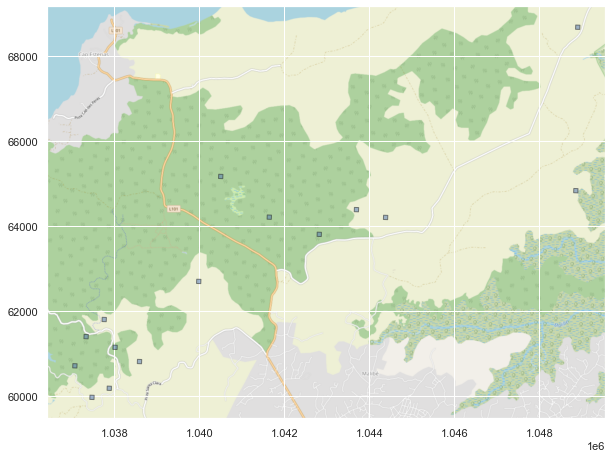

In [13]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.sources.OSM_A)

### Bring in the DATA

In [14]:
footprint = pd.read_csv(datadir+'LVIS2_withPlots.csv')#mass of above-ground components of tree (kg) 
footprint.to_csv(datadir +'footprint.csv')
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

### Organize Plot data for trees 

The next value we need AGBM. The AGBM take all of the AGB values from all of the trees that fall with into a shot buffer. This value is used to check the field measurement of this LIDAR meausement and to see how accurate the LIDAR biomass index is compared with what is accualty going on the ground.   

In [15]:
#Creating the .25 hec plots 
tree.loc[(tree['subplot'] == 1)|(tree['subplot'] == 2)| (tree['subplot'] == 7)| (tree['subplot'] == 8), 'subplot25'] = '1.2'
tree.loc[(tree['subplot'] == 4)|(tree['subplot'] == 5)| (tree['subplot'] == 3)| (tree['subplot'] == 6), 'subplot25'] = '1.1'
tree.loc[(tree['subplot'] == 12)|(tree['subplot'] == 13)| (tree['subplot'] == 11)| (tree['subplot'] == 14), 'subplot25'] = '2.1'
tree.loc[(tree['subplot'] == 9)|(tree['subplot'] == 10)| (tree['subplot'] == 15)| (tree['subplot'] == 16), 'subplot25'] = '2.2'
#Create unqure id for subplot25 and 0625 
tree['ID_subplot25'] = tree['plot'] + tree['subplot25']

tree['subplot_0625'] =  tree['subplot']
tree['subplot_0625'] =  tree['subplot'].astype(int)

In [16]:
tree['subplot_0625'] =  tree['subplot']*10

In [17]:
tree['subplot_0625'] =  tree['subplot'].astype(str)
tree['ID_subplot_0625'] = tree['plot'] + tree['subplot_0625']
#Filter for -9999
#tree = tree[(tree.m_agb >= 0)]
tree = tree[(tree.m_agb >= 1)]
#Create subplot tables 
tree_plot = tree 
tree_plot25 = tree 
tree_plot625 = tree

In [18]:
#AGB and Tree Height 

In [19]:
tree

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625,ID_subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10,NASA0210
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15,NASA0215
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11,NASA1311
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,6,NASA206
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,12,NASA2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,NaN,NaN,NASA20,6,2/12/2016 0:00,Euphorbiaceae,Anthostema aubryanum,0.330000,101724,1,...,-9999.0,7.93,0.050,1,1.6,3.98,1.1,NASA201.1,6,NASA206
6640,NaN,NaN,NASA21,4,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101878,1,...,-9999.0,7.93,0.050,1,1.3,3.89,1.1,NASA211.1,4,NASA214
6641,NaN,NaN,NASA21,9,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101889,1,...,-9999.0,7.93,0.050,1,1.3,3.89,2.2,NASA212.2,9,NASA219
6642,NaN,NaN,NASA14,12,2/1/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101397,1,...,-9999.0,8.16,0.053,1,1.3,3.40,2.1,NASA142.1,12,NASA1412


<AxesSubplot:xlabel='plot', ylabel='count'>

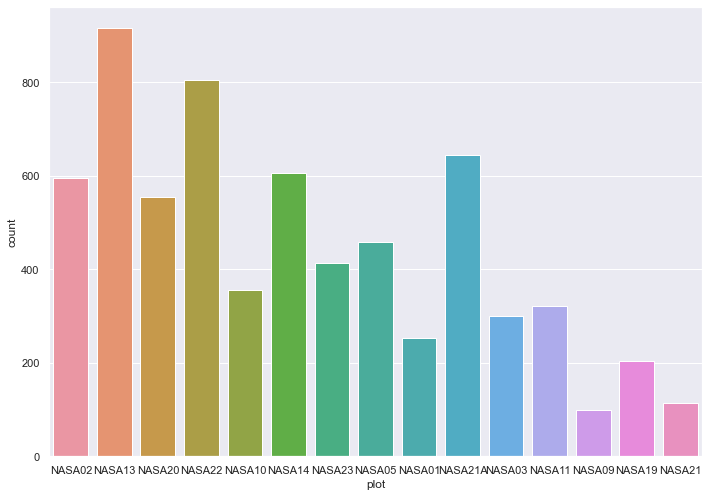

In [20]:
sns.countplot(data = tree, x='plot')

<AxesSubplot:xlabel='plot', ylabel='m_agb'>

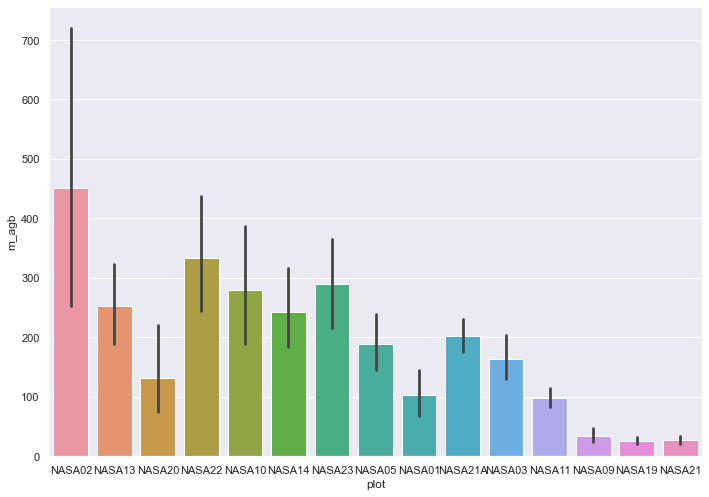

In [21]:
sns.barplot(data = tree, x='plot',y = 'm_agb')

<AxesSubplot:xlabel='plot', ylabel='h_t_mod'>

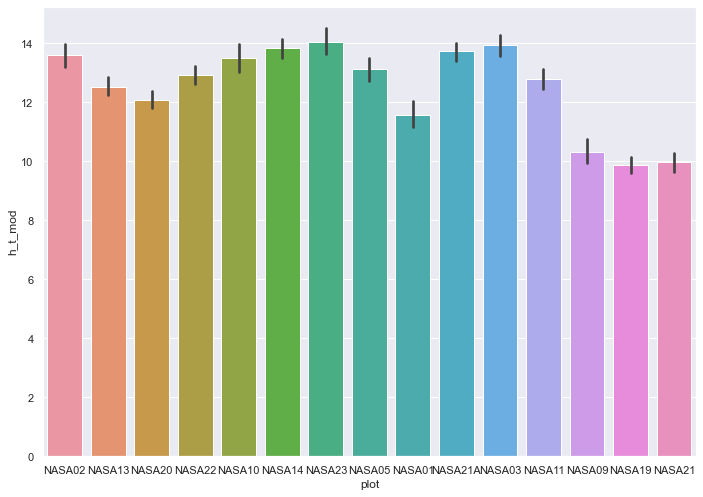

In [22]:
sns.barplot(data = tree, x='plot',y = 'h_t_mod')

<AxesSubplot:xlabel='h_t_mod', ylabel='Count'>

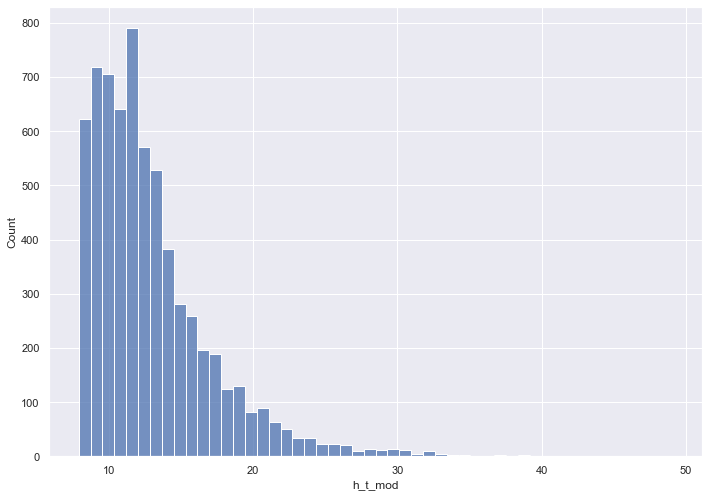

In [23]:
sns.histplot(data = tree
            ,x = 'h_t_mod'
             ,bins = 50
            )

<AxesSubplot:xlabel='h_t_mod', ylabel='Count'>

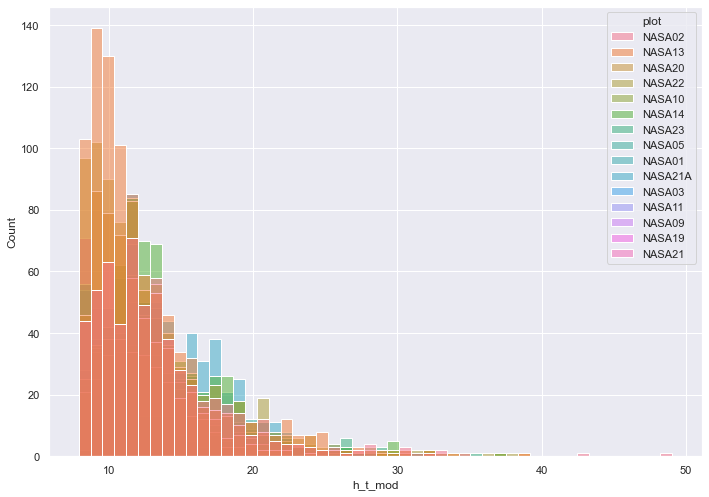

In [24]:
sns.histplot(data = tree
            ,x = 'h_t_mod'
             ,bins = 50,hue ="plot"
            )

In [25]:
tree_filter = tree[(tree.m_agb < 3000)]

In [26]:
print(tree['m_agb'].value_counts())

17.10      18
34.45      18
48.42      18
38.80      17
53.71      16
           ..
1316.59     1
357.08      1
43.77       1
47.91       1
1552.00     1
Name: m_agb, Length: 3673, dtype: int64


In [27]:
tree

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625,ID_subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10,NASA0210
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15,NASA0215
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11,NASA1311
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,6,NASA206
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,12,NASA2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,NaN,NaN,NASA20,6,2/12/2016 0:00,Euphorbiaceae,Anthostema aubryanum,0.330000,101724,1,...,-9999.0,7.93,0.050,1,1.6,3.98,1.1,NASA201.1,6,NASA206
6640,NaN,NaN,NASA21,4,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101878,1,...,-9999.0,7.93,0.050,1,1.3,3.89,1.1,NASA211.1,4,NASA214
6641,NaN,NaN,NASA21,9,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101889,1,...,-9999.0,7.93,0.050,1,1.3,3.89,2.2,NASA212.2,9,NASA219
6642,NaN,NaN,NASA14,12,2/1/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101397,1,...,-9999.0,8.16,0.053,1,1.3,3.40,2.1,NASA142.1,12,NASA1412


<AxesSubplot:xlabel='m_agb', ylabel='Count'>

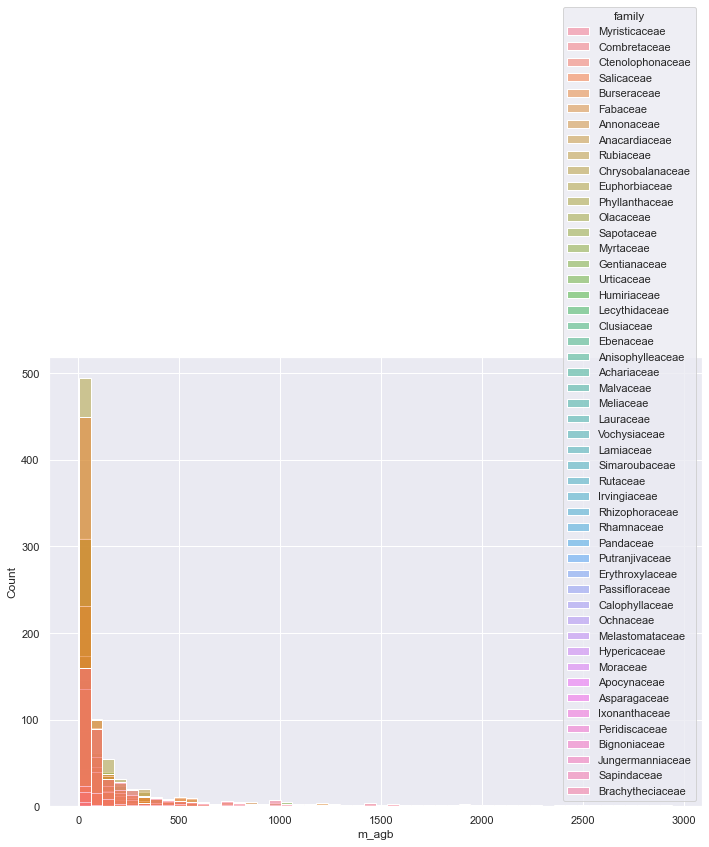

In [28]:
sns.histplot(data = tree_filter
            ,x = 'm_agb'
             ,bins = 50,hue ="family"
            )

<AxesSubplot:xlabel='m_agb', ylabel='Count'>

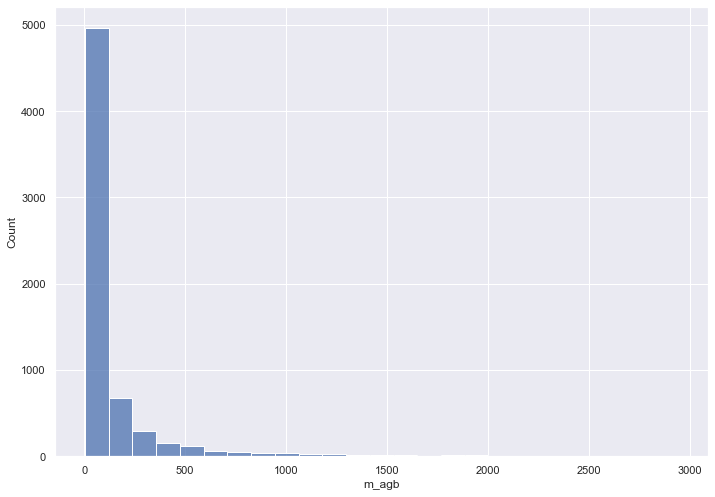

In [29]:

sns.histplot(data = tree_filter
            ,x = 'm_agb'
             ,bins = 25
            )

<AxesSubplot:xlabel='plot', ylabel='h_t_mod'>

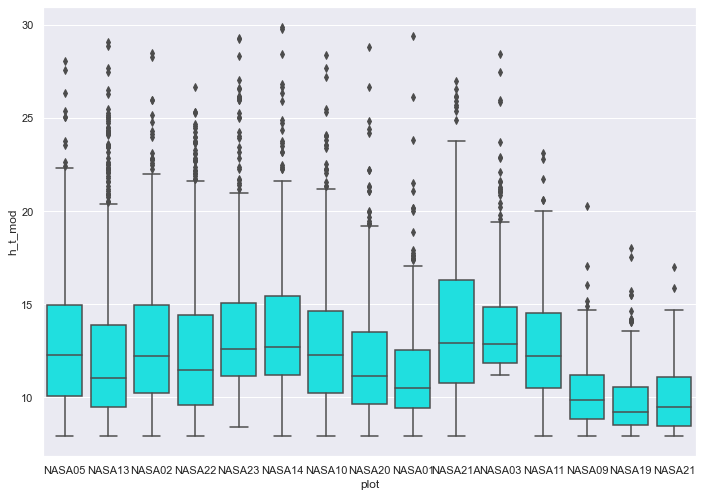

In [30]:
sns.boxplot(data = tree_filter
            ,x = "plot"
            ,y = "h_t_mod"
            ,color = 'cyan'
            )

<AxesSubplot:xlabel='plot', ylabel='m_agb'>

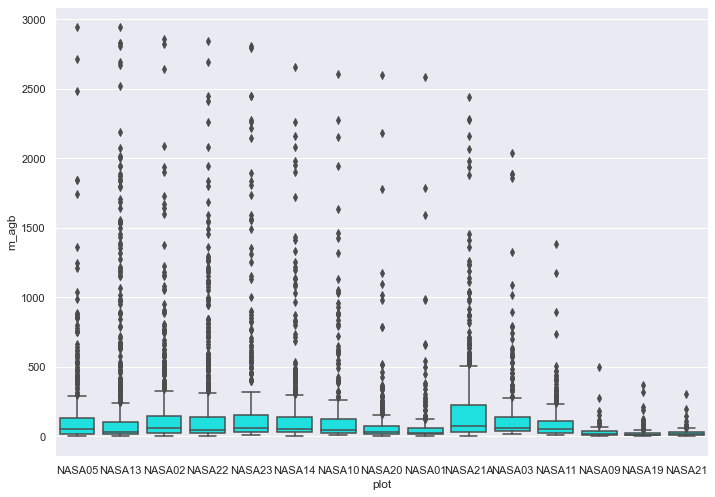

In [31]:
sns.boxplot(data = tree_filter
            ,x = "plot"
            ,y = "m_agb"
            ,color = 'cyan'
            )

In [32]:
#Histagram of Height by plot and subplot 

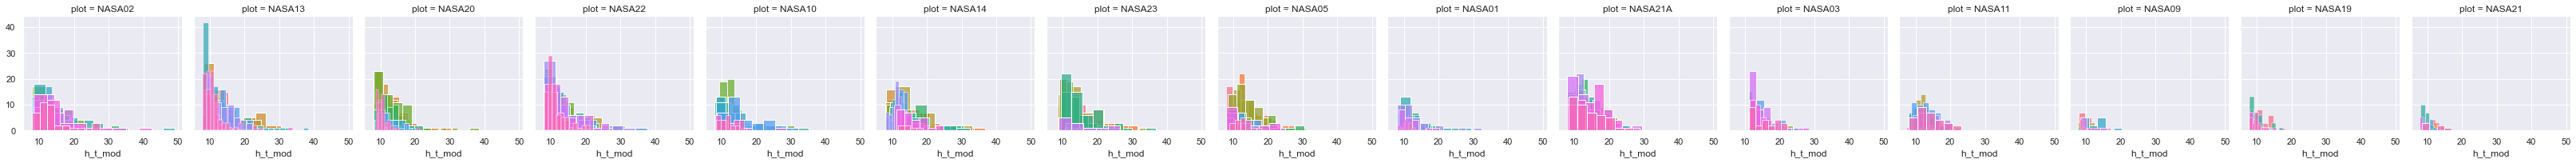

In [33]:
g = sns.FacetGrid(tree, col="plot",hue="subplot")
#g.map(sns.scatterplot,"m_agb","h_t_mod")
g.map(sns.histplot,"h_t_mod")

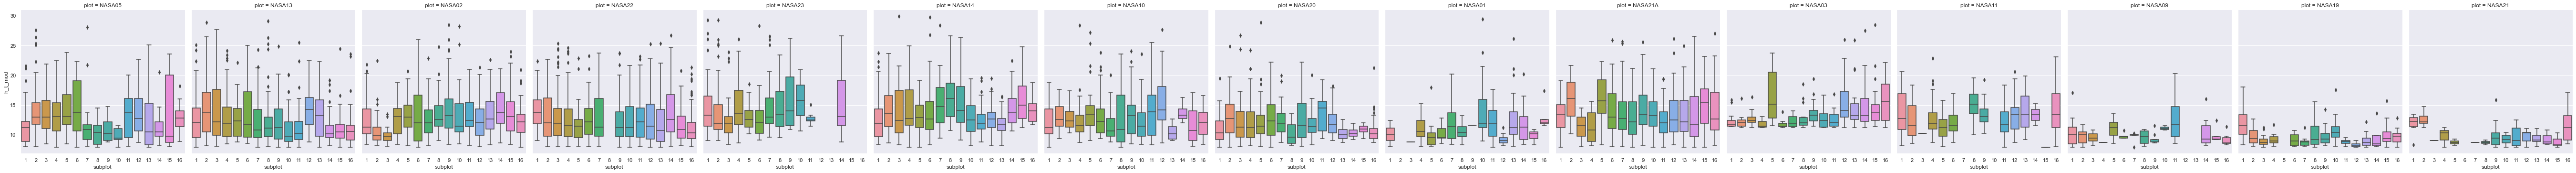

In [60]:
sns.catplot(
    data=tree_filter, x='subplot', y="h_t_mod",
    col="plot", kind='box'
)

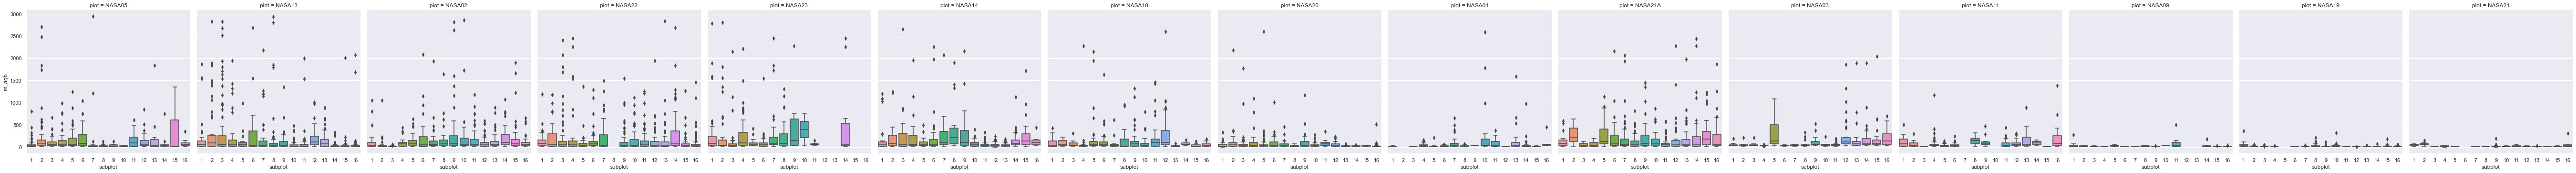

In [61]:
sns.catplot(
    data=tree_filter, x='subplot', y="m_agb",
    col="plot", kind='box'
)

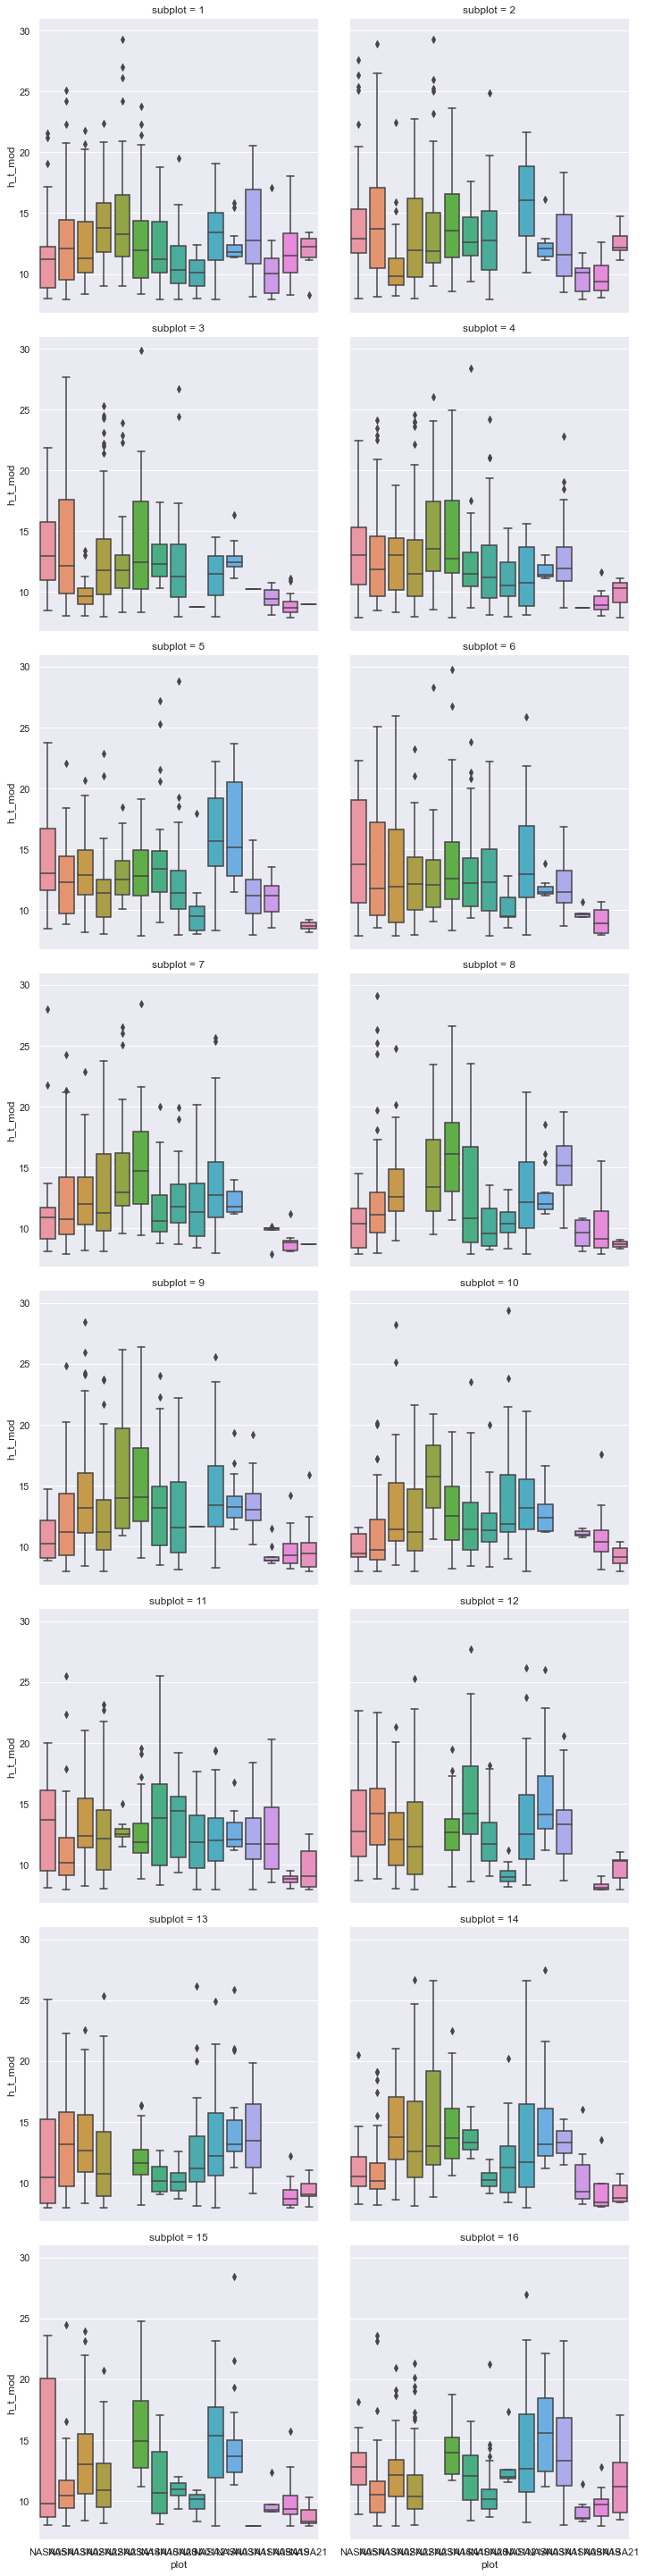

In [58]:
sns.catplot(
    data=tree_filter, x="plot", y="h_t_mod",
    col='subplot', kind='box', col_wrap=2
)

In [57]:
sns.boxplot(data = tree_filter
            ,x = "plot"
            ,y = "h_t_mod"
            ,hue = "subplot =1"
            )

ValueError: Could not interpret input 'subplot =1'

TypeError: 'AxesSubplot' object is not callable

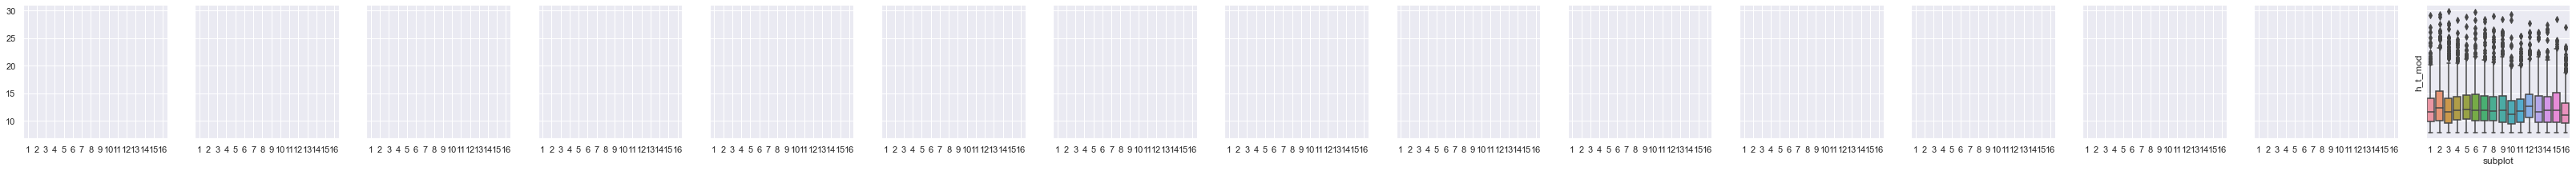

In [ ]:
sns.boxplot(data = tree_filter
            ,x = "plot"
            ,y = "h_t_mod"
            ,color = 'cyan'
            )

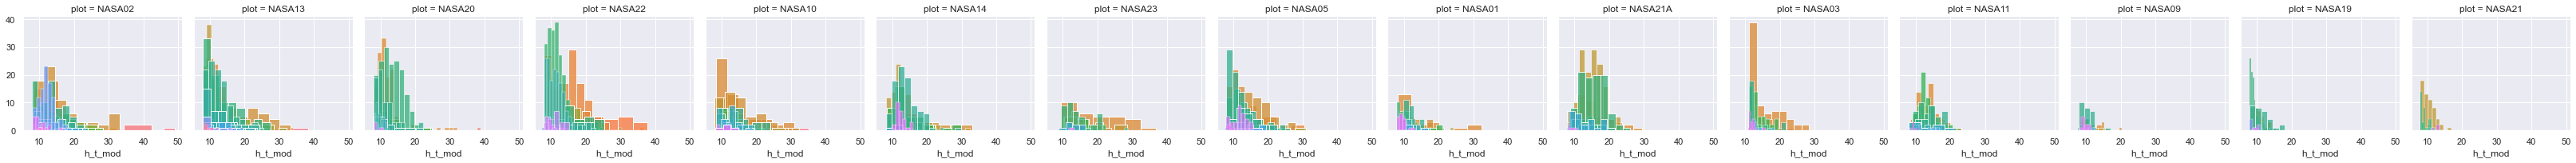

In [137]:
g = sns.FacetGrid(tree, col="plot",hue ="family")
#g.map(sns.scatterplot,"m_agb","h_t_mod")
g.map(sns.histplot,"h_t_mod")

In [138]:
#Histagram of AGB by plot and subplot 

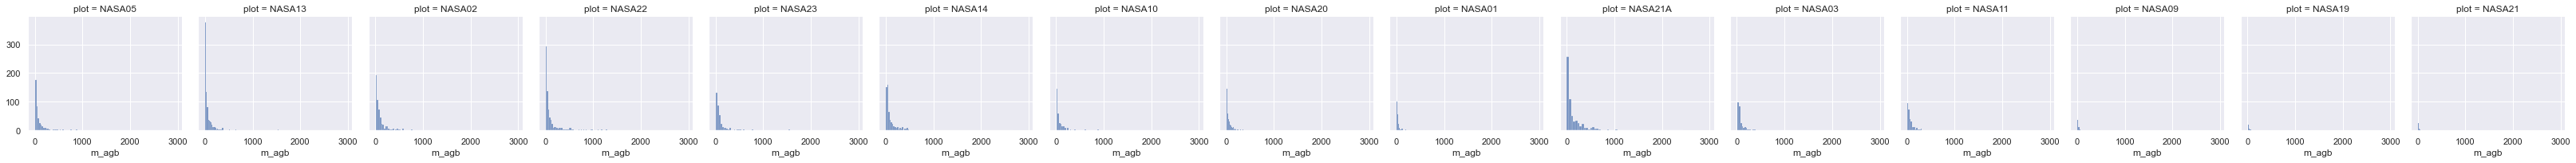

In [139]:
g = sns.FacetGrid(tree_filter, col="plot")
#g.map(sns.scatterplot,"m_agb","h_t_mod")
g.map(sns.histplot,"m_agb")

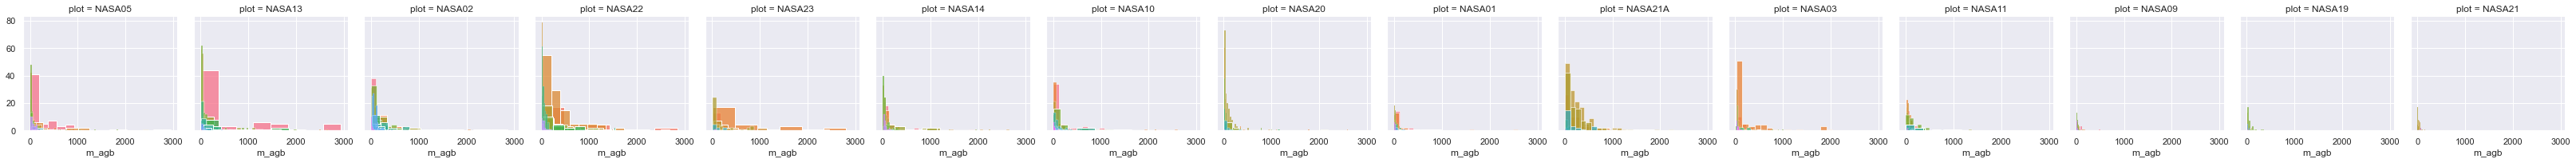

In [140]:
g = sns.FacetGrid(tree_filter, col="plot",hue ="family")
#g.map(sns.scatterplot,"m_agb","h_t_mod")
g.map(sns.histplot,"m_agb")

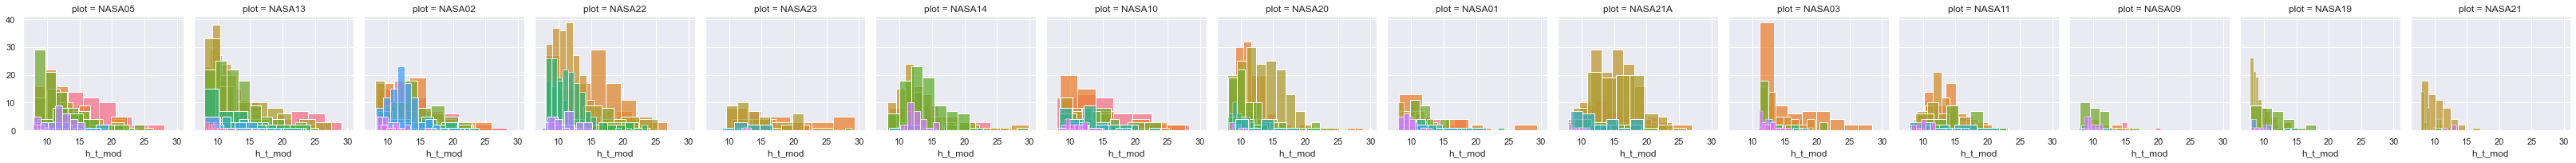

In [141]:
g = sns.FacetGrid(tree_filter, col="plot",hue="family")
#g.map(sns.scatterplot,"m_agb","h_t_mod")
g.map(sns.histplot,"h_t_mod")

In [142]:
#sns.boxplot(x='plot',y='m_agb',data=tree)

In [143]:
#sns.boxplot(x='ID_subplot_0625',y='m_agb',data=tree)

In [21]:
#g = sns.FacetGrid(tree, col="ID_subplot_0625",hue="family")
#g.map(sns.scatterplot,"m_agb","h_t_mod")

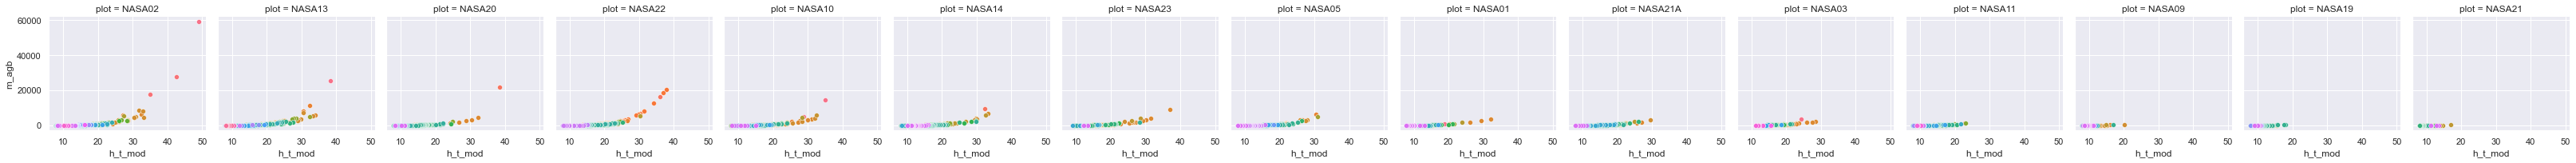

In [31]:
g = sns.FacetGrid(tree, col="plot",hue="family")
#g.map(sns.scatterplot,"m_agb","h_t_mod")
g.map(sns.scatterplot,"h_t_mod","m_agb")

In [23]:
#AGB plot 

In [24]:
treechart1 = tree[(tree.h_t_mod >= 0)]
treechart2 = tree[(tree.h_t >= 0)]

<AxesSubplot:xlabel='m_agb', ylabel='h_t_mod'>

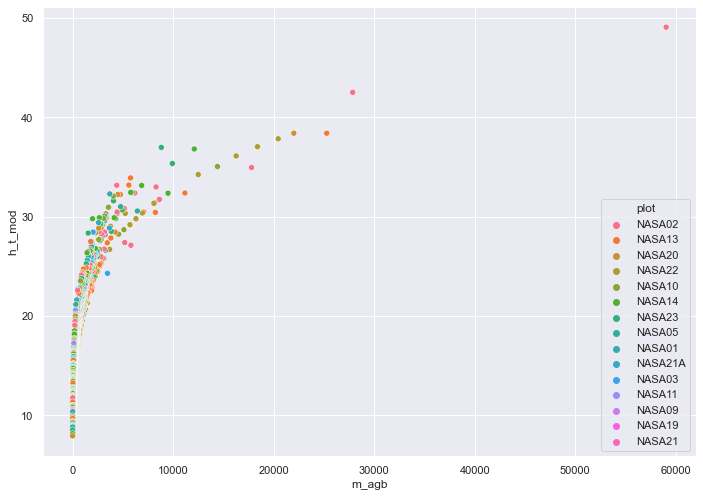

In [25]:
sns.scatterplot(x = "m_agb", y = "h_t_mod", data = treechart1, hue = "plot")


<AxesSubplot:xlabel='m_agb', ylabel='h_t'>

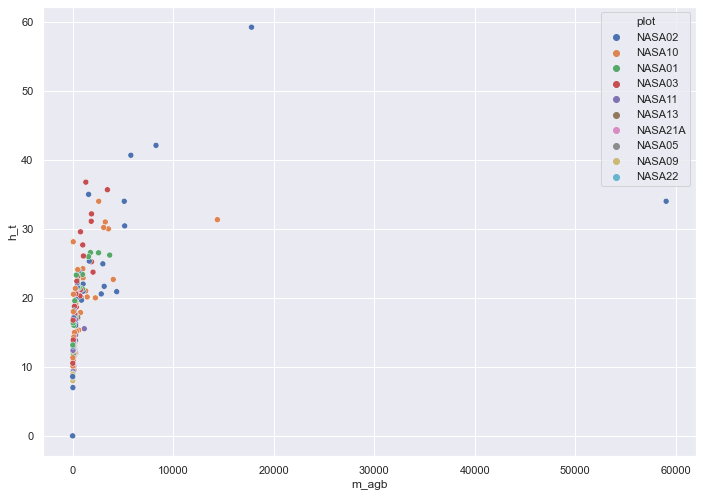

In [26]:
sns.scatterplot(x = "m_agb", y = "h_t", data = treechart2, hue = "plot")

# RA write more comments on my section



In [1]:
"""
---------------------------------------------------------------------------------------------------
Biomass Index Calculation Using LVIS Data
Author: Alex Rojas
---------------------------------------------------------------------------------------------------
"""
# Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import math
from pyproj import CRS
import os
import argparse
import sys
from scipy.ndimage import gaussian_filter
import glob
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# --------------------------COMMAND LINE ARGUMENTS AND ERROR HANDLING---------------------------- #
# Set up argument and error handling
parser = argparse.ArgumentParser(description='Calculate biomassindex using LVIS Level 1 and Level 2 Data.')
parser.add_argument('--dir', required=True, help='LVIS file directory.')
parser.add_argument('--roi', required=True, help='Polygons to subset the LVIS data. \
                    Valid inputs are a geojson or .shp file.')
parser.add_argument('--out', required=True, help='Output file name.')
parser.add_argument('--field', required=False, help='Name of the field with unique names for polygons. If left blank, index ID numbers will be used.')
parser.add_argument('--savefig', required=False, default="False", help='Plot waveforms for each plot and save to file (Default:True).')

# Parse the arguments
args = parser.parse_args()

# --------------------------------SET ARGUMENTS TO VARIABLES------------------------------------- #

### Get all the arguments into variables ###

## Get the input directory ubti a variable, and search directory for LVIS1 abd 2 files
#  Handle the input parameter syntax for using glob function
if args.dir is None:
    inputDir = os.getcwd()
else:
    inputDir = args.dir

    if inputDir[0] == ".":
        inputDir = inputDir[2:]
    elif inputDir[0] == "/" or inputDir[0] == "\\":
        inputDir = inputDir[1:]

if inputDir.endswith("/") or inputDir.endswith("\\") != True:
    inputDir = inputDir + "/"

inputDir = inputDir.replace("\\", "/")

# Search for different file name possibilities
fileNameL1 = ['LVIS1B*','*level1*', '*LVIS1*']
fileNameL2 = ['LVISF2*','*level2*', "*LVIS2*"]
filtered_list1 = []
for name in fileNameL1:
     filtered_list1.extend(glob.glob(inputDir + name))

filtered_list2 = []
for name in fileNameL2:
     filtered_list2.extend(glob.glob(inputDir + name))

lvisL1_fn = filtered_list1[0]
lvisL2_fn = filtered_list2[0]

## ROI file setting argument and reading into dataframe
# Read the ROI into a geopandas dataframe
roi_file = args.roi

if roi_file.endswith('.shp'):
    # If it is a shapefile, read in the file normally
    try:
        roi_poly = gpd.read_file(roi_file)
        roi_poly.reset_index(inplace=True) # reset the index and rename it
        roi_poly = roi_poly.rename(columns={'index':'index_poly'})
    except:
        print('error: unable to read input shapefile.')
        sys.exit(2)
elif roi_file.endswith('json'):
    # Currently, this program does not support geojson. Future versions will.
    print("Currently unable to accept geojson files as ROI inputs. Future updates to program will include GeoJSON functionality.")
    sys.exit(2)
else:
    # No accepted file input for geometries passed
    print("Please use a shapefile for the ROI.")
    sys.exit(2)

## Get the output file name
outFile_var = args.out
if outFile_var.endswith(".csv") != True:
    # if it does not end with .csv, add the ,.csv
    outFile_var = outFile_var + ".csv"

## Get the field name
fieldName = args.field
if args.field is None:
    # If the field argument is not passed, set fieldName to "index_poly" to identify polygons
    fieldName = "index_poly"
else:
    # else use the argument passed as the field name to add polygon name to datafram
    fieldName = args.field

## Get the savefig parameter into a variable
savefig_var = args.savefig

# -------------------------------------SET UP WORKSPACE------------------------------------------ #

## ALL DATA PROCESSING HANDLED IN MEMORY DURING EXECUTION OF PYTHON FILE (not saved to disk) ##


# ---------------------------------LVIS PREPROCESSING-------------------------------------------#

# If the file cannot be opened, there is no LVIS L2 data file in the directory
try:
    # First, get the commented line with the LVIS2 header data to use as the column names for LVIS L2 dataframe
    with open(lvisL2_fn) as fh:
        while True:
            line = fh.readline()
            # If it is the coomment line that starts with "# LFID" then
            # save the text to a variable and break while statement
            if line.startswith('# LFID'):
                lvis_header = line
                break
except:
    # exit the program if no LVIS2 file is detected
    print("LVIS level 2 data file not detected. Please make sure the filename contains \
        'LVIS2' in it, (e.g. LVISF2_ABoVE2019_0729_R2003_085251.txt),\n \
        which is what this program uses to search for in the file name.")
    sys.exit()

# Split the saved LVIS header line by the whitespace into a list
lvisL2ColumnNames = lvis_header[2:].split()

## Read the LVIS2 text file into a dataframe, skipping all the commented lines
lvisL2_df = pd.read_csv(lvisL2_fn, delimiter='\s+', comment="#", header=None)
# Add the column names from the LVIS header line
lvisL2_df.columns = lvisL2ColumnNames

# Search through the column names and get the LAT LON column names saved to variables
for colName in lvisL2_df.columns:
    if (colName.find('LON') != -1):
        # if the column name has LON in it, save it to a variable
        lonColName = colName
    elif (colName.find('LAT') != -1):
        # if LAT
        latColName = colName
    else:
        # Else continue
        continue


## Create a GeoPandas dataFrame to add spatial capabilities
# Create a geopandas dataframe using the (LON, LAT) coordinates from the lvis_df
lvisL2_gdf = gpd.GeoDataFrame(
    lvisL2_df, geometry=gpd.points_from_xy(lvisL2_df[lonColName], lvisL2_df[latColName]))
# set the CRS to WGS84
lvisL2_gdf = lvisL2_gdf.set_crs("EPSG:4326")

## Project the LVIS L2 to the proper UTM zone for spatial filtering

## Mathematically locate the UTM zone from the lat long coordinates for distance analysis for longitude degrees east (ABOVE DATA)
## Get the longitude from one point the data to identify the UTM Zone (https://apollomapping.com/blog/gtm-finding-a-utm-zone-number-easily)
# lon_deg_east = lvisL2_gdf[lonColName].iloc[0]
# lon = lon_deg_east-360
# # Add 180 to the longitude, then divide by 6 and round up to the next highest whole number
# utmzoneNumber = math.ceil((lon + 180) / 6)

# Mathematically locate the UTM zone from the lat long coordinates for distance analysis for regular longitude coordinates (AfriSAR data)
# Get the longitude from one point the data to identify the UTM Zone (https://apollomapping.com/blog/gtm-finding-a-utm-zone-number-easily)
lon_deg = lvisL2_gdf[lonColName].iloc[0]
lon180 = lon_deg + 180
# Add 180 to the longitude, then divide by 6 and round up to the next highest whole number
utmzoneNumber = math.ceil(lon180 / 6)

# Project the geodataframe to UTM zone
# get the first latitude point to determine whether we are north or south of the equator
lat = lvisL2_gdf[latColName].iloc[0]

if lat > 0:
    # North
    crs = CRS.from_string(f"+proj=utm +zone={utmzoneNumber} +north")
else:
    # Else its south
    crs = CRS.from_string(f"+proj=utm +zone={utmzoneNumber} +south")

# Project the GDF to the UTM zone
lvisL2_gdf = lvisL2_gdf.to_crs(f"EPSG:{crs.to_authority()[1]}")

# ---------------------------------LVIS SPATIAL FILTERING-------------------------------------------#

# Reproject the polygon to the proper UTM zone (CRS should automatically be read from shapefiles in geopandas)
roi_poly = roi_poly.to_crs(f"EPSG:{crs.to_authority()[1]}")

# Add a buffer around the polygons to account for geolocatin errors in LVIS !!!!!!!!
roi_poly['geometry'] = roi_poly.buffer(10) # 10 meters

# Filter the LVIS level 2 data by clipping all points within the buffer
lvisL2_filt = gpd.sjoin(lvisL2_gdf, roi_poly, how="inner", op="within")

## Read and filter the LVIS level 1 data
# Read the LVIS level 1 file using h5py
lvisL1_data = h5py.File(lvisL1_fn, 'r')

# Create a DataFrame from the LVIS data
# Add the variables to a list, then append to a dataframe
variables_dict = {}
for key in lvisL1_data.keys():
    # if the keys are any of these below, continue to the next key
    if key == "RXWAVE" or key == "TXWAVE" or key == "ancillary_data":
        continue
    else:
        # add the data as a new entry to the dictionary
        variables_dict[key] = lvisL1_data[key][:]

# Create a DataFrame
lvisL1_df = pd.DataFrame(variables_dict)
## Add the RXWAVE and TXWAVE
lvisL1_df['RXWAVE'] = lvisL1_data['RXWAVE'][:].tolist()
lvisL1_df['TXWAVE'] = lvisL1_data['TXWAVE'][:].tolist()

# Search through the column names and get the LAT LON column names saved to variables
for colName in lvisL1_df.columns:
    if (colName.find('LON') != -1):
        # if the column name has LON in it, save it to a variable
        lonColName = colName
    elif (colName.find('LAT') != -1):
        # if LAT
        latColName = colName
    else:
        # Else continue
        continue

## Create a GeoPandas dataFrame to add spatial capabilities
# Create a geopandas dataframe using the (LON0, LAT0) coordinates from the lvis_df
lvisL1_gdf = gpd.GeoDataFrame(
    lvisL1_df, geometry=gpd.points_from_xy(lvisL1_df[lonColName], lvisL1_df[latColName]))
# set the CRS to WGS84
lvisL1_gdf = lvisL1_gdf.set_crs("EPSG:4326")
# Project the LVISL1 GDF to the UTM zone
lvisL1_gdf = lvisL1_gdf.to_crs(f"EPSG:{crs.to_authority()[1]}")

## Filter the LVIS Level 1 data using the filtered Level 2 dataframe from eariler
shotnumberListFilt = lvisL2_filt['SHOTNUMBER'].tolist()
lvisL1_filt = lvisL1_gdf[lvisL1_gdf['SHOTNUMBER'].isin(shotnumberListFilt)].copy()

# --------------------------------------BIOMASS INDEX CALCULATION------------------------------------- #

# Initialize variablies
wfrange = 1024
wfsize = 1023

# Get either Z1023 or Z1215 column name (Above data uses Z1215, AfriSAR uses 1023)
for colName in lvisL1_df.columns:
    if (colName.find('Z0') != -1):
        # if the column name has Z0 in it, save it to a variable
        Z0_colName = colName
    elif (colName.find('Z1') != -1):
        # else if Z1
        Z1023_colName = colName
    else:
        # Else continue
        continue

# Initialize a df list to add the calcualted biomass index for each shot
df_list = []

## Loop through each shot number, calculating BIOMASS Index for each LiDAR shot

for shotnum in shotnumberListFilt:
    # calculate biomass in here
    lvisL1_series = lvisL1_filt.loc[lvisL1_filt["SHOTNUMBER"] == shotnum].iloc[0]
    lvisL2_series = lvisL2_filt.loc[lvisL2_filt["SHOTNUMBER"] == shotnum].iloc[0]

    # print the rxwave vlaues and type for sanity check lol
    # print(type(lvisL1_series["RXWAVE"]), lvisL1_series["RXWAVE"])

    #extract the single waveform and elevation attributes Z0 and Z1023;
    waveform = lvisL1_series['RXWAVE']

    #This extracting the Z0
    Z0 = int(lvisL1_series[Z0_colName])

    #!! This extracting the Z1023 (it is Z1215 in the Above LVIS datasets)
    Z1023 = int(lvisL1_series[Z1023_colName])

    #?? Check if this does anything
    # x = Z0 - Z1023

    # Smooth the waveform
    waveform = gaussian_filter(waveform, sigma=3)

    # set the z range limits for plotting the waveform to crop the noise
    #Remove 122320
    #zmin = RH10 - (ZT - RH10) / 6  # sets zmin at 15% below the waveform range defined in RH10-ZT
    #zmax = ZT + (ZT - RH10) / 18  # sets zmax at 5% above the waveform range defined in RH10-ZT

    # Getting values from the LVIS level 2 file for analysis
    ZG = lvisL2_series['ZG']
    ZT = lvisL2_series['ZT']
    RH10 = lvisL2_series['RH10']
    RH25 = lvisL2_series['RH25']
    RH50 = lvisL2_series['RH50']
    RH75 = lvisL2_series['RH75']   
    RH95 = lvisL2_series['RH95']
    RH98 = lvisL2_series['RH98']
    RH100 = lvisL2_series['RH100']

    #find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
    zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

    #This subtract with the ground height normalizing everything
    zstretch = zstretch - ZG

    # crop the waveform and elevation arrays to the z range limits
    x = zstretch #>= zmin  # this returns boolean True/False based on the comparison condition statement
    y = zstretch #<= zmax
    z = (x == y)  # this creates a combined boolean result from the previous two condition statements
    waveform_crop = []
    zstretch_crop = []
    for i in range(0, len(waveform)):
        if z[i] == True:
            waveform_crop.append(waveform[i])
            zstretch_crop.append(zstretch[i])
        
    # Save the SIGMEAN as an array
    SIGMEAN = np.array(lvisL1_series['SIGMEAN'])

    cal_wave = np.subtract(waveform , SIGMEAN)
    cal_wave = cal_wave.reshape(cal_wave.size,1)

    X = np.arange(1024)
    X = X.reshape(X.size,1)

    #elevation
    wz = X*((Z1023 - Z0)/1024) +Z0
    #Height
    wz = np.subtract(wz, ZG)

    filter_arr = np.logical_and(-10 < wz, wz < RH100)

    ind = wz[filter_arr]

    wz = wz[filter_arr]

    #Should be a table of 1000
    bio = 0
    sub_wz = wz # -
    sub_cal_wave = cal_wave[filter_arr] # -
    sum_count = np.sum(sub_cal_wave) #
    iii=0

    #that reads everything
    for iii , elements in  enumerate(sub_cal_wave):
        #print(bio)
        #print(iii)
        #print(iii+1)
        #print(sub_cal_wave[iii]/sum_count)
        #dp[iii] = (sub_cal_wave[iii]/sum_count)
        if (sub_wz[iii] > - 10) and (sub_wz[iii] < 0) :
            bio = bio + sub_wz[iii] * sub_wz[iii] * (sub_cal_wave[iii]/sum_count) * (-1.0)
        else:
            bio = bio + sub_wz[iii] * sub_wz[iii] * (sub_cal_wave[iii]/sum_count)
            #print('This is the bio')
            #print(bio)
            #print(myshotnum)

    # Save all values to a dataframe for easier processing (remember, fieldName is the fieldName for the polygons)
    df = pd.DataFrame({'SHOTNUMBER': [shotnum], "BIOMASS_INDEX": [bio], fieldName: [lvisL2_series[fieldName]], "RXWAVE": [waveform], "ZG":[ZG], "ZT":[ZT], "RH100":[RH100], "RH98":[RH98]})
    # append to the dataframe list to concatenate afterwards
    df_list.append(df)

# Concatenate the entire df list
df_concat_final = pd.concat(df_list)

## Save as a csv file using the outFile argument from the user
df_concat_final.to_csv(outFile_var)
print("Biomass Calculation Saved as a CSV file...")


# -------------------------------------MULTIPLOT LVIS WAVEFORM---------------------------------------------------- #

# Get just the shotnumber and ZG, ZTOP columns from the lvisL2
lvis2SHOT_ZGZT = lvisL2_filt[['SHOTNUMBER', "ZG", "ZT", fieldName]].copy()
lvisFiltMerged_df = pd.merge(lvisL1_filt, lvis2SHOT_ZGZT, on="SHOTNUMBER")
# print(len(lvisL1_filt))
# print(len(lvisFiltMerged_df["Plot"].unique()))
# print(kjhsdf)

# Create a function for overplotting waveforms from each polygon in subplots
def plot_groups(df, outfile):
    
    ## Group the df by plot
    grouped_df = df.groupby(fieldName) #change to field name for the .py code
    groupIDXs = df.groupby(fieldName).groups # gets a tuple with group names and indexes
    
    i = 1 # counter to add for file nameing convention
    
    def plot_six(out, i):
        
        # Initialize the subplot axes
        fig, axs = plt.subplots(figsize=(16,12), 
                                nrows=2, ncols=3)
        fig.tight_layout()
        
        for ax in axs.flatten():
            
        # Go through each axes, pop a groupIDX from the groupIDXs variable and use that to filter the
        # LVIS dataframe, then plot
            
            try:
                popped_groupIDX = groupIDXs.popitem() # get one group name and its associated indices
                plot_groupDF = grouped_df.get_group(popped_groupIDX[0]) 
                
                for index, row in plot_groupDF.iterrows():
                    # plot each shot in the dataframe
                    # Get the height range, and subtract ZG
                    elevationArr = np.linspace(row['Z1023'], row['Z0'], num=1024)
                    heightArr = elevationArr - row['ZG']
                    rxwaveArr = np.array(row['RXWAVE'])

                    # Smooth the waveform for plotting? (review with Dr. Ni)
                    rxwave_smooth = gaussian_filter(rxwaveArr, sigma=2)
                    rxwaveArr_rev = rxwave_smooth[::-1]
                    ax.plot(rxwaveArr_rev, heightArr)
                    
                # Add the ground return as a line
                ax.axhline(color="black", linestyle='--', linewidth=0.8)
                # Remove x and y axis labels
                ax.set_xlabel(None)
                ax.set_ylabel(None)
                # Add the plot id to title of subplot, and the count as inset text to plot
                ax.set_title(f"Plot:{plot_groupDF[fieldName].iloc[0]}", fontsize=16) # change to fieldName
                ax.text(0.85, .2, f"Count: {plot_groupDF['SHOTNUMBER'].count()}",
                        ha='center', transform=ax.transAxes, fontsize=12)
                ax.tick_params(axis='both', labelsize=10)
                # Get the handles,labels from the legend, then remove the legend from the subplot
                
            except:
                break
            
        # Add a title and x/ylabels for entire figure
        fig.subplots_adjust(top=.9)
        fig.subplots_adjust(left=.1)
        fig.subplots_adjust(right=.87)
        fig.subplots_adjust(bottom=.1)
        fig.subplots_adjust(hspace=.20)
        fig.suptitle('LVIS RXWAVE in Each Plot', fontsize=20, y=0.98)
        fig.text(0.5, 0.04, 'RXWAVE', ha='center', fontsize=18)
        fig.text(0.04, 0.5, 'Height', va='center', rotation='vertical', fontsize=18)
        
        # Save the figure
        fig.savefig(f"{outfile}_WFplots_{i}.png", dpi=300)
    

    # generate plots until there are none left!
    while len(groupIDXs) !=  0:
        plot_six(outfile, i)
        i+=1 # add 1 to the file extension for naming

    ## ------------------------------------------ END FUNCTION FOR MULTIPLOTTING --------------------------------------- ##

## Call the multiplot function
# if the parameter is set to True (which is default),
if savefig_var.lower() in ('yes', 'true', 't', 'y', '1'):
    # plot the lvis df
    plot_groups(lvisFiltMerged_df, outFile_var[:-4])
    # Print a success statement for plotting
    print("Waveform data was plotted...")
    print("All Done!")

elif savefig_var.lower() in ('no', 'false', 'f', 'n', '0'):
    print("All Done!")

usage: ipykernel_launcher.py [-h] --dir DIR --roi ROI --out OUT [--field FIELD] [--savefig SAVEFIG]
ipykernel_launcher.py: error: the following arguments are required: --dir, --roi, --out


SystemExit: 2

C:\Users\17183\anaconda3\envs\G_H_GEDI\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Organize Plot data for LIDAR

 # Field data 

To access the accuracy of  of the Biomass index it import the aggerate the data to larger plot levels. This project aggregates the data to 15 hector plots. Those plots are then again sub divided into quarter hector plot and one-sixtieth hector plots. 


Starting with the tree level data, the AGB of each tree is summed by their plot. This then divided by and 10^3*plotsize. The converts the results into mega gram per hector. This is done at the sixteenth of hector level quarter hector level and hector level. 


In [27]:
sumstep = ['ID_subplot_0625', 'm_agb']
trees_plot625_sum= tree_plot625[sumstep]
trees_plot625= trees_plot625_sum.groupby(by='ID_subplot_0625').sum()/(10**3 *.0625)
trees_plot625.to_csv(datadir +'trees_plot625.csv')
trees_plot625 = pd.read_csv(datadir + 'trees_plot625.csv')

sumstep = ['ID_subplot25', 'm_agb']
trees_plot25_sum= tree_plot25[sumstep]
trees_plot25= trees_plot25_sum.groupby(by='ID_subplot25').sum()/(10**3 *.25)
trees_plot25.to_csv(datadir +'trees_plot25.csv')
trees_plot25 = pd.read_csv(datadir + 'trees_plot25.csv')

sumstep = ['plot', 'm_agb']
trees_plot_sum= tree_plot[sumstep]
trees_plot= trees_plot_sum.groupby(by='plot').sum()/(10**3 )
trees_plot.to_csv(datadir +'trees_plot.csv')
trees_plot = pd.read_csv(datadir + 'trees_plot.csv')

# LIDAR processing

Next the lidar data is process at the plot and subplot levels. The LIDAR data is made up of the RHXX values and the biomass index. Each of the RHXX value and biomass index are average at each of the plot and subplot levels. 

In [28]:
L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
#Create unqure id for subplot25 and 0625 
L2all['subplot025'] =   L2all['subplot025'].astype(str)
L2all['ID_subplot25'] =L2all['plot'] + L2all['subplot025']

L2all = L2all[(L2all.subplot625 >= 0)]
L2all['subplot625'] =   L2all['subplot625'].astype(int)

In [29]:
L2all['subplot625'] =   L2all['subplot625'].astype(str)
L2all['ID_subplot625'] = L2all['plot'] + L2all['subplot625']


# remove special character 
L2all.ID_subplot625 = L2all.ID_subplot625.str.replace('.', '') 
#Create subplot tables


###  LIDAR filtering

In [30]:
sub_set = ['SHOTNUMBER', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd','ID_subplot625', 'plot','ID_subplot25']
L2all = L2all[sub_set]



Next the lidar data is process at the plot and subplot levels. The LIDAR data is made up of the RHXX values and the biomass index. Each of the RHXX value and biomass index are average at each of the plot and subplot levels. 

In [31]:
#RA - Do this for each of the plots 
#filter out unneeded columns#Remove Agbd 
L2_All_625 = L2all.groupby(by='ID_subplot625').mean()
L2_All_625.to_csv(datadir +'L2_All_625.csv')
L2_All_625 = pd.read_csv(datadir + 'L2_All_625.csv')

L2_All_25 = L2all.groupby(by='ID_subplot25').mean()
L2_All_25.to_csv(datadir +'L2_All_25.csv')
L2_All_25 = pd.read_csv(datadir + 'L2_All_25.csv')

L2_All_plot = L2all.groupby(by='plot').mean()
L2_All_plot.to_csv(datadir +'L2_All_plot.csv')
L2_All_plot = pd.read_csv(datadir + 'L2_All_plot.csv')

# LIDAR Graphs 

In [32]:
### RH50 biomass index 

<AxesSubplot:xlabel='RH50', ylabel='bio_mass_index'>

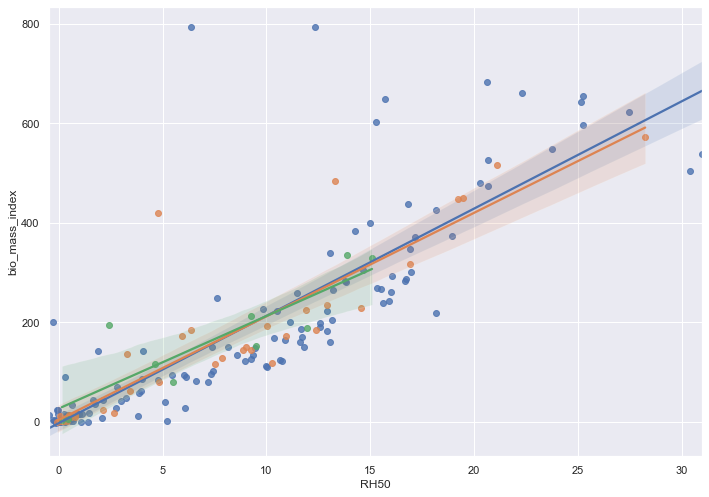

In [33]:
sns.regplot(data=L2_All_625, x='RH50', y='bio_mass_index')
sns.regplot(data=L2_All_25, x='RH50', y='bio_mass_index')
sns.regplot(data=L2_All_plot, x='RH50', y='bio_mass_index')

                    RH50  bio_mass_index
RH50            1.000000        0.858651
bio_mass_index  0.858651        1.000000
Final rmse value is = 246.98448100730553


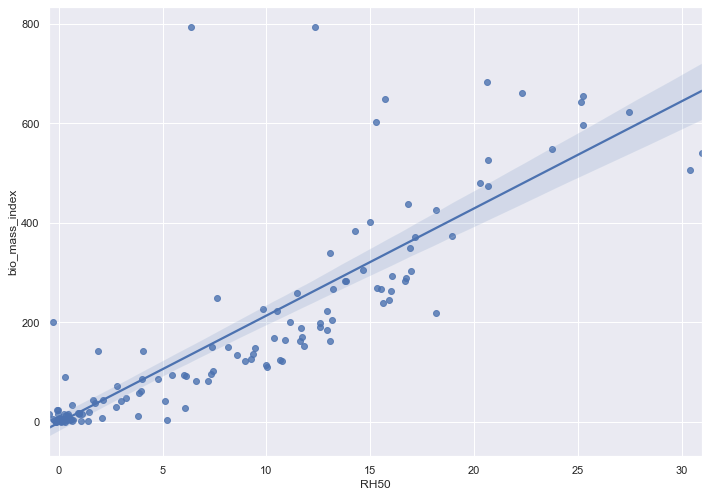

In [34]:
##Find RMSE ----https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx

sns.regplot(data=L2_All_625, x='RH50', y='bio_mass_index')

#Correlation Coefficient 
foo = ['RH50','bio_mass_index']
x = L2_All_625[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['RH50']
x = L2_All_625[foo]
x=  x.to_numpy()
foo = ['bio_mass_index']
y = L2_All_625[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

#combined rmse value
#rss=((y_test-y_pred)**2).sum()
#print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

                    RH50  bio_mass_index
RH50            1.000000        0.892878
bio_mass_index  0.892878        1.000000
Final rmse value is = 221.10997377767632


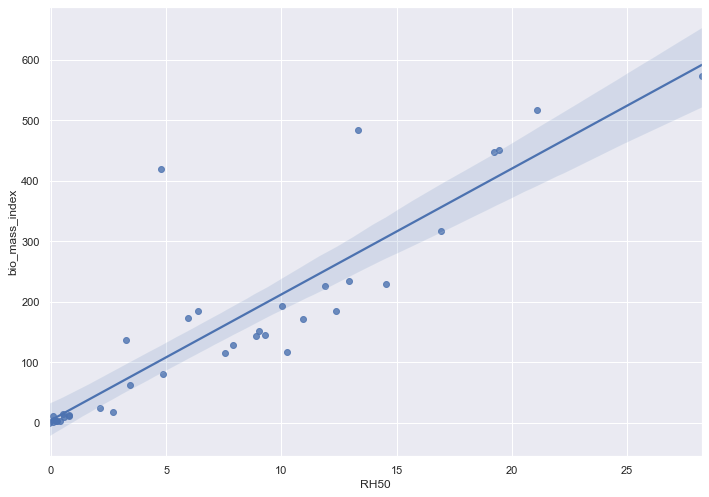

In [35]:
sns.regplot(data=L2_All_25, x='RH50', y='bio_mass_index')

#Correlation Coefficient 
foo = ['RH50','bio_mass_index']
x = L2_All_25[foo]
correlationsa = x.corr(method="pearson")
print (correlationsa)



###RMSE 
foo = ['RH50']
x = L2_All_25[foo]
x=  x.to_numpy()
foo = ['bio_mass_index']
y = L2_All_25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                    RH50  bio_mass_index
RH50            1.000000        0.874232
bio_mass_index  0.874232        1.000000
Final rmse value is = 187.35140653656848


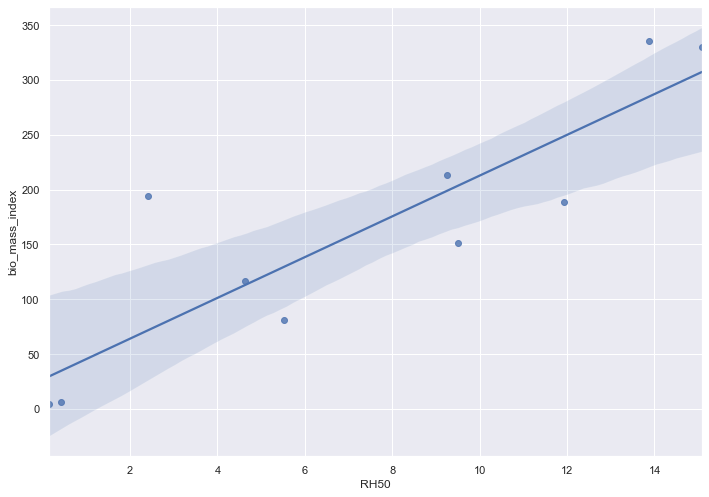

In [36]:
sns.regplot(data=L2_All_plot, x='RH50', y='bio_mass_index')

#Correlation Coefficient 
foo = ['RH50','bio_mass_index']
x = L2_All_plot[foo]
correlationsa = x.corr(method="pearson")
print (correlationsa)



###RMSE 
foo = ['RH50']
x = L2_All_plot[foo]
x=  x.to_numpy()
foo = ['bio_mass_index']
y = L2_All_plot[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

### Biomass index and AGBD 

<AxesSubplot:xlabel='bio_mass_index', ylabel='agbd'>

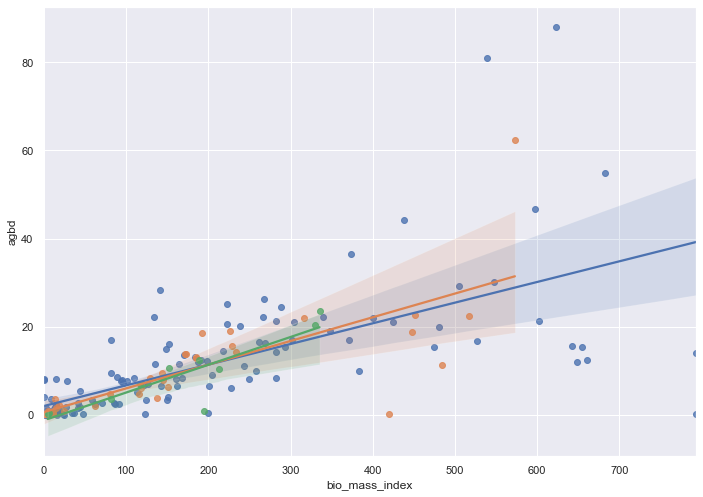

In [37]:


sns.regplot(data=L2_All_625, x="bio_mass_index", y="agbd")
sns.regplot(data=L2_All_25, x="bio_mass_index", y="agbd")
sns.regplot(data=L2_All_plot,x="bio_mass_index", y="agbd")


                bio_mass_index      agbd
bio_mass_index        1.000000  0.680707
agbd                  0.680707  1.000000
Final rmse value is = 243.96079623121702


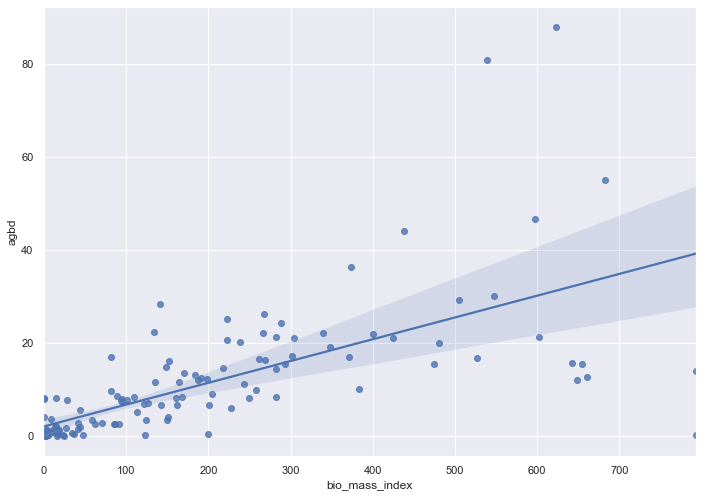

In [38]:
sns.regplot(data=L2_All_625, x="bio_mass_index", y="agbd")
#Correlation Coefficient 
foo = ['bio_mass_index','agbd']
x = L2_All_625[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['bio_mass_index']
x = L2_All_625[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_625[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index      agbd
bio_mass_index        1.000000  0.767685
agbd                  0.767685  1.000000
Final rmse value is = 218.1525349651803


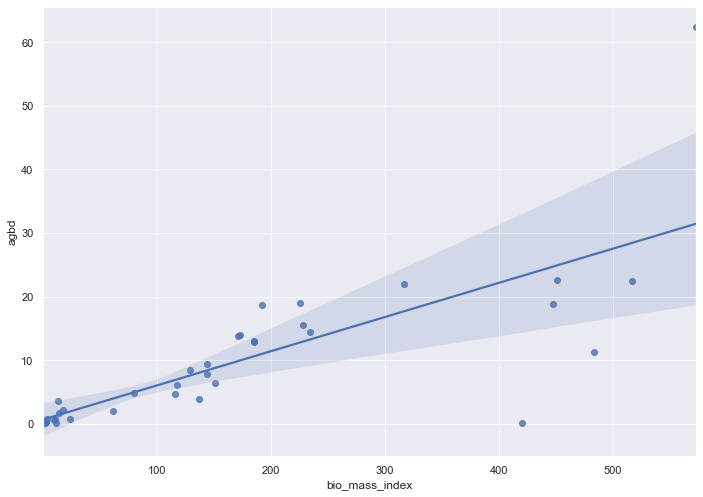

In [39]:
sns.regplot(data=L2_All_25, x="bio_mass_index", y="agbd")
foo = ['bio_mass_index','agbd']
x = L2_All_25[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['bio_mass_index']
x = L2_All_25[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index      agbd
bio_mass_index        1.000000  0.885765
agbd                  0.885765  1.000000
Final rmse value is = 184.58589958626567


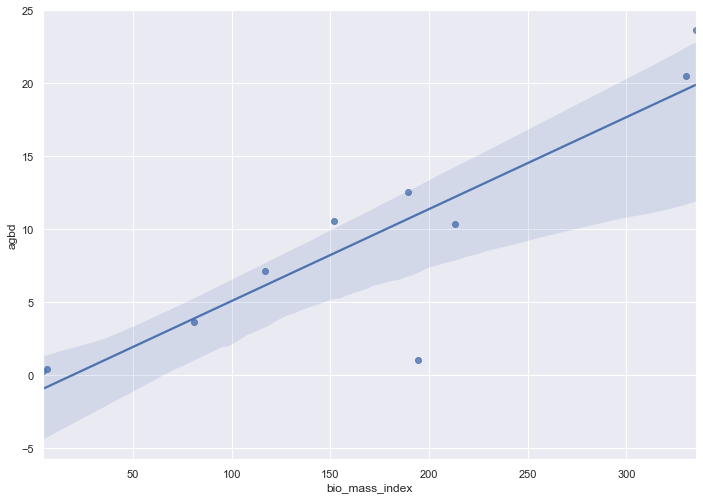

In [40]:
sns.regplot(data=L2_All_plot,x="bio_mass_index", y="agbd")
foo = ['bio_mass_index','agbd']
x = L2_All_plot[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['bio_mass_index']
x = L2_All_plot[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_plot[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

### RH50 and AGBD

<AxesSubplot:xlabel='RH50', ylabel='agbd'>

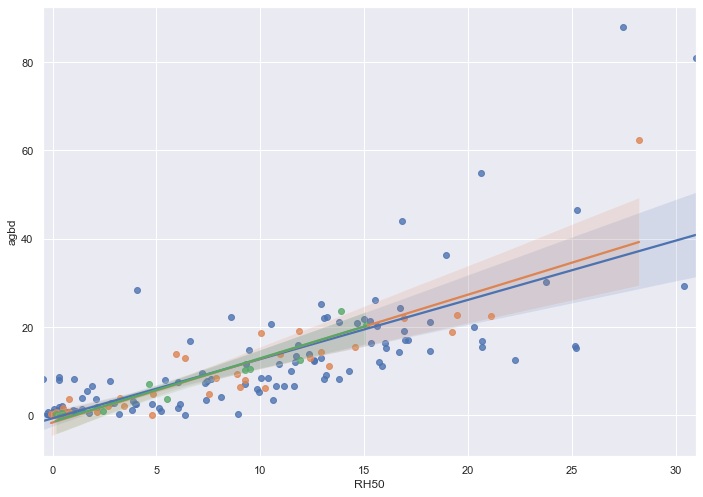

In [41]:
sns.regplot(data=L2_All_625, x="RH50", y="agbd")
sns.regplot(data=L2_All_25, x="RH50", y="agbd")
sns.regplot(data=L2_All_plot,x="RH50", y="agbd")

          RH50      agbd
RH50  1.000000  0.776216
agbd  0.776216  1.000000
Final rmse value is = 9.13050654097677


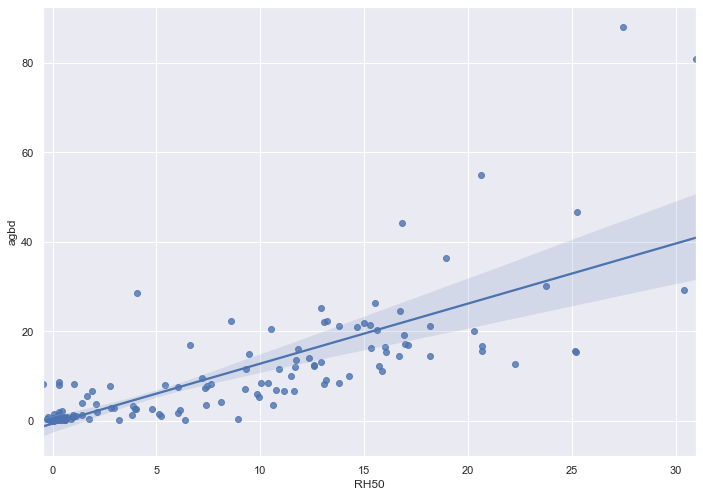

In [42]:

sns.regplot(data=L2_All_625, x="RH50", y="agbd")
#Correlation Coefficient 
foo = ['RH50','agbd']
x = L2_All_625[foo]
correlationsa = x.corr(method="pearson")
print(correlationsa)

###RMSE 
foo = ['RH50']
x = L2_All_625[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_625[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))





          RH50      agbd
RH50  1.000000  0.888195
agbd  0.888195  1.000000
Final rmse value is = 6.409272312966334


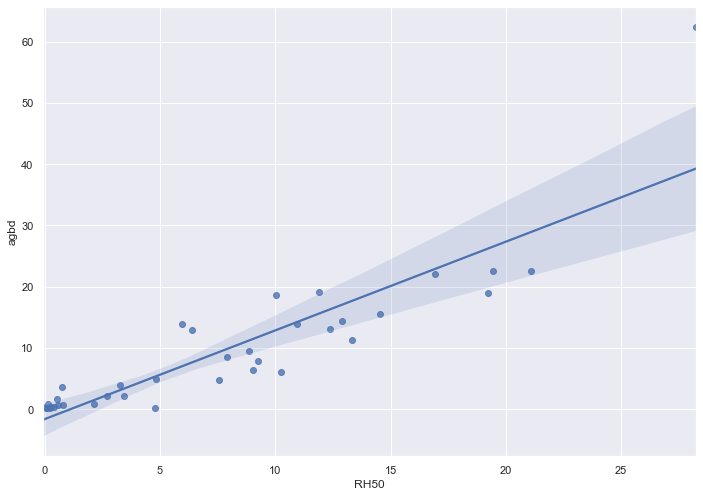

In [43]:
sns.regplot(data=L2_All_25, x="RH50", y="agbd")
#Correlation Coefficient 
foo = ['RH50','agbd']
x = L2_All_25[foo]
correlationsb = x.corr(method="pearson")
print(correlationsb)

###RMSE 
foo = ['RH50']
x = L2_All_25[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

          RH50      agbd
RH50  1.000000  0.951569
agbd  0.951569  1.000000
Final rmse value is = 3.7273692221566166


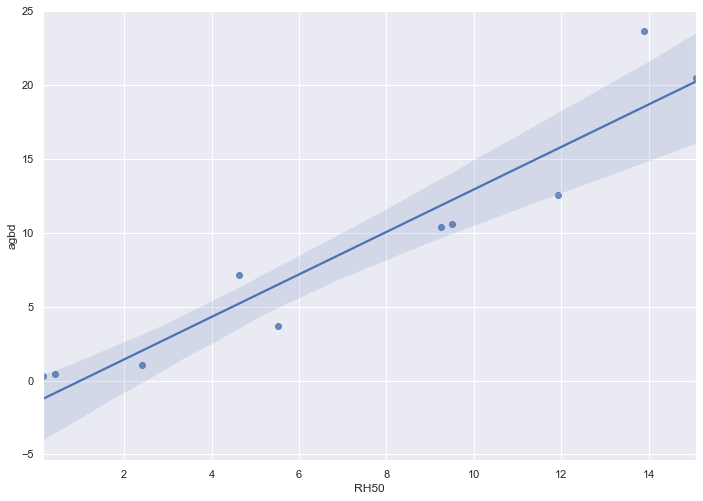

In [44]:

sns.regplot(data=L2_All_plot,x="RH50", y="agbd")
#Correlation Coefficient 
foo = ['RH50','agbd']
x = L2_All_plot[foo]
correlationsc = x.corr(method="pearson")
print(correlationsc)


###RMSE 
foo = ['RH50']
x = L2_All_plot[foo]
x=  x.to_numpy()
foo = ['agbd']
y = L2_All_plot[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

# LIDAR  MLR Regression Charts 

# Join Tree and LIDAR DATA 

### Subplot_625  Join 

In [45]:
subplot625 =  L2_All_625.set_index('ID_subplot625').join(trees_plot625.set_index('ID_subplot_0625'))
subplot625.to_csv(datadir +'subplot625.csv')
subplot625 = pd.read_csv(datadir + 'subplot625.csv')


subplot25 =  L2_All_25.set_index('ID_subplot25').join(trees_plot25.set_index('ID_subplot25'))
subplot25.to_csv(datadir +'subplot25.csv')
subplot25 = pd.read_csv(datadir + 'subplot25.csv')


plot_whole =  L2_All_plot.set_index('plot').join(trees_plot.set_index('plot'))
plot_whole.to_csv(datadir +'plot_whole.csv')
plot_whole = pd.read_csv(datadir + 'plot_whole.csv')



In [46]:
subplot625

,ID_subplot625,SHOTNUMBER,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,...,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,m_agb
0,NASA011,9902931.5,-0.560000,0.930000,2.095000,3.025000,3.850000,4.595000,5.270000,5.830000,...,10.280000,11.285000,11.590000,11.960000,12.445000,13.155000,15.025000,793.077065,0.156629,6.27296
1,NASA0116,9903715.5,-1.600000,-1.115000,-0.740000,-0.405000,-0.035000,0.265000,0.600000,1.015000,...,7.590000,9.985000,11.145000,12.190000,13.195000,14.430000,16.070000,0.274309,4.032319,10.20944
2,NASA018,9903155.5,-1.530000,-1.010000,-0.600000,-0.155000,0.335000,0.930000,1.605000,2.395000,...,7.510000,8.375000,8.635000,9.005000,9.455000,10.245000,11.645000,47.272262,0.222216,3.70640
3,NASA019,9903417.0,-1.866667,-1.546667,-1.270000,-1.023333,-0.796667,-0.623333,-0.446667,-0.273333,...,1.770000,2.440000,2.666667,2.966667,3.436667,4.310000,6.096667,23.173004,0.137815,0.48112
4,NASA021,9898937.5,-3.370000,-2.461250,-1.768750,-1.187500,-0.673750,-0.241250,0.180000,0.611250,...,6.643750,8.908750,10.051250,11.408750,12.485000,13.797500,15.756250,0.428357,8.128812,74.49360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,NASA235,9896659.5,-0.861667,0.083333,0.860000,1.733333,2.870000,4.190000,5.475000,6.756667,...,19.095000,20.940000,21.426667,22.298333,23.670000,24.816667,26.736667,150.561552,4.059288,32.62048
138,NASA236,9896659.5,5.162500,6.827500,8.080000,9.145000,10.100000,10.940000,11.707500,12.512500,...,20.180000,21.755000,22.147500,22.592500,23.175000,24.205000,26.972500,204.175840,9.106087,93.83648
139,NASA237,9896659.5,1.295000,3.253333,5.121667,6.706667,8.165000,9.698333,11.068333,12.206667,...,24.933333,26.688333,27.140000,27.661667,28.475000,29.483333,31.615000,265.905751,22.210316,232.86944
140,NASA238,9896659.5,4.355000,7.405000,10.025000,12.602500,15.145000,17.072500,18.397500,19.517500,...,30.550000,32.642500,33.127500,33.615000,34.195000,34.942500,36.552500,474.037408,15.506596,325.00960


In [47]:
#Find coocoef 

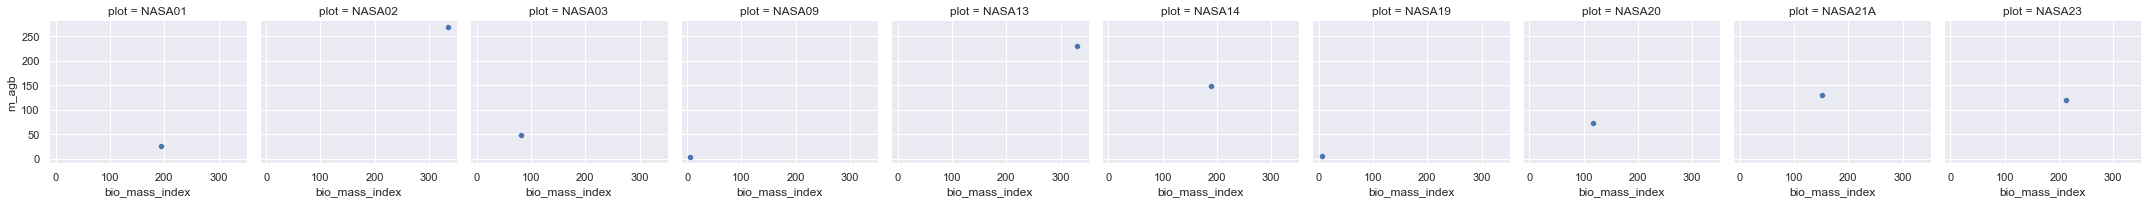

In [48]:
g = sns.FacetGrid(plot_whole, col="plot")
g.map(sns.scatterplot,"bio_mass_index","m_agb")

<AxesSubplot:xlabel='plot', ylabel='RH50'>

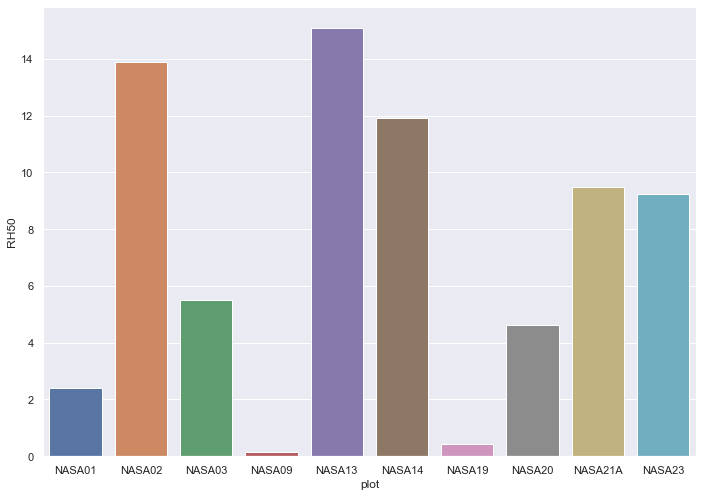

In [49]:
sns.barplot(x='plot',y='RH50',data=plot_whole)

<AxesSubplot:xlabel='plot', ylabel='RH100'>

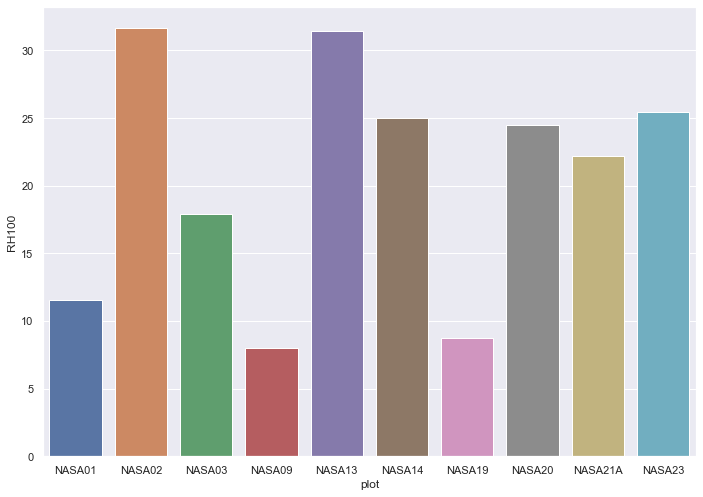

In [50]:
sns.barplot(x='plot',y='RH100',data=plot_whole)

<AxesSubplot:xlabel='plot', ylabel='m_agb'>

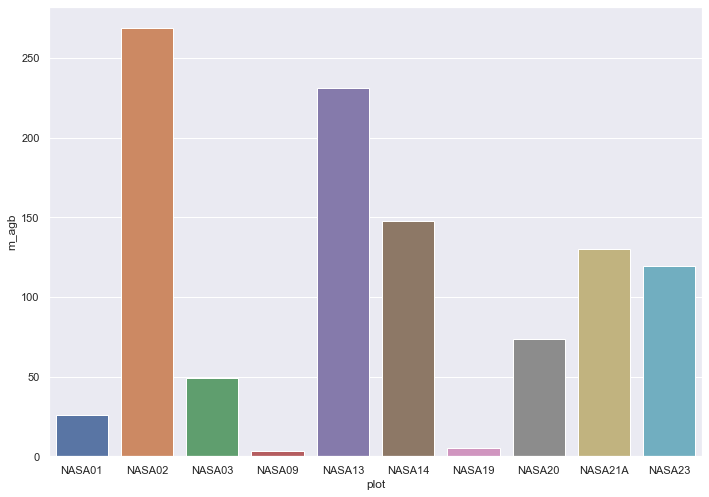

In [51]:
sns.barplot(x='plot',y='m_agb',data=plot_whole)

<AxesSubplot:xlabel='plot', ylabel='bio_mass_index'>

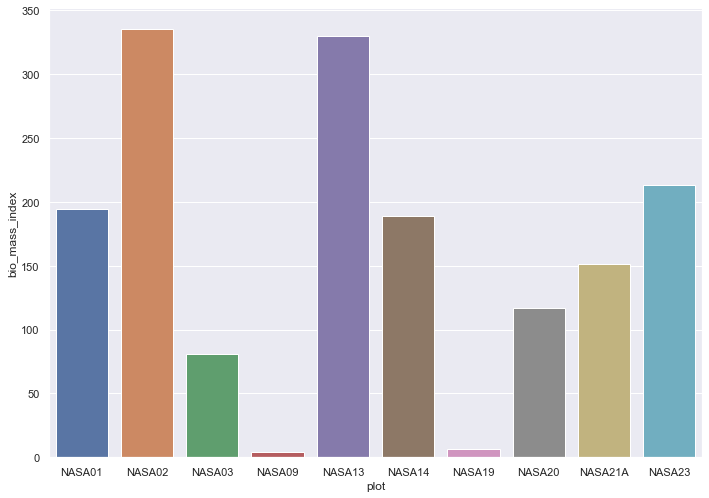

In [52]:
sns.barplot(x='plot',y='bio_mass_index',data=plot_whole)

<AxesSubplot:xlabel='bio_mass_index', ylabel='m_agb'>

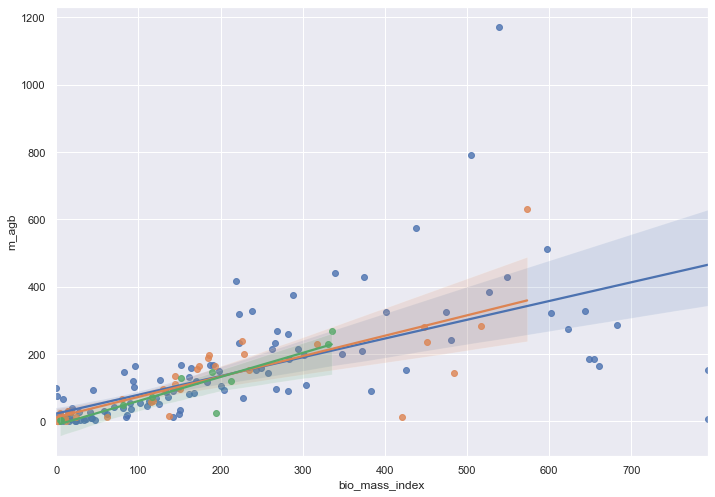

In [53]:
sns.regplot(data=subplot625, x="bio_mass_index", y="m_agb")
sns.regplot(data=subplot25,  x="bio_mass_index", y="m_agb")
sns.regplot(data=plot_whole, x="bio_mass_index", y="m_agb")

                bio_mass_index     m_agb
bio_mass_index        1.000000  0.669675
m_agb                 0.669675  1.000000
Final rmse value is = 159.821617614582


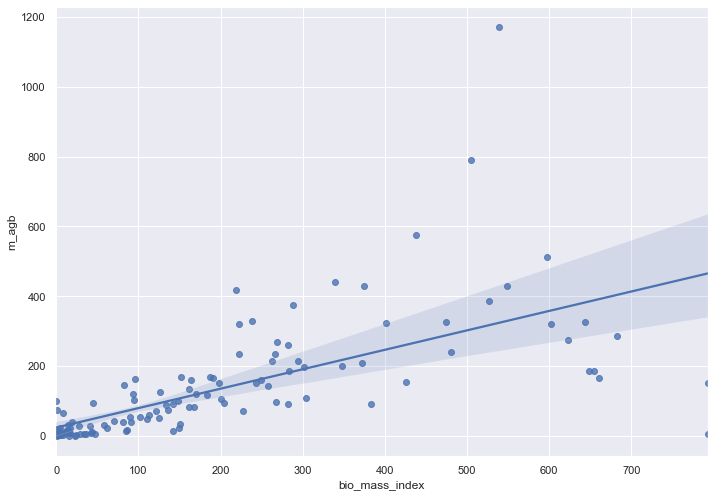

In [54]:
#Remove NAN
subplot625 =subplot625.dropna()
#Graph
sns.regplot(data=subplot625, x="bio_mass_index", y="m_agb")
#Correlation coefficents 
foo = ['bio_mass_index','m_agb']
x = subplot625[foo]
correlations = x.corr(method="pearson")
print(correlations)

###RMSE 
foo = ['bio_mass_index']
x = subplot625[foo]
x =  x.to_numpy()
foo = ['m_agb']
y = subplot625[foo]
y = y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index     m_agb
bio_mass_index        1.000000  0.800319
m_agb                 0.800319  1.000000
Final rmse value is = 111.39720251544645


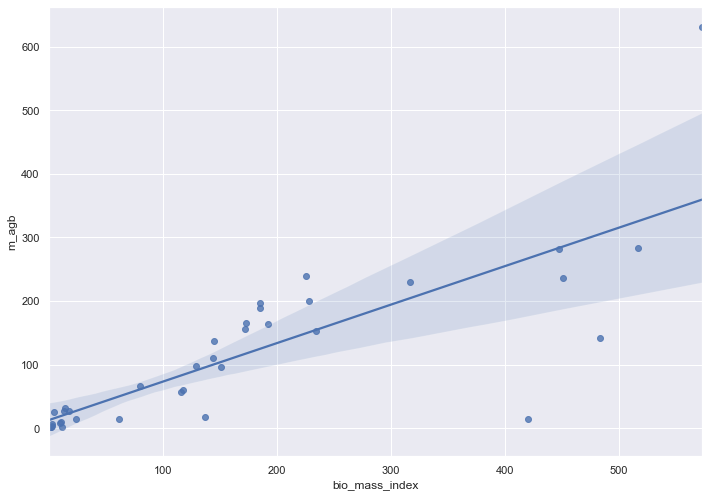

In [55]:
sns.regplot(data=subplot25,  x="bio_mass_index", y="m_agb")
#Correlation coefficents 
foo = ['bio_mass_index','m_agb']
x = subplot25[foo]
correlations = x.corr(method="pearson")
print(correlations)


###RMSE 
foo = ['bio_mass_index']
x = subplot25[foo]
x =  x.to_numpy()
foo = ['m_agb']
y = subplot25[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))

                bio_mass_index     m_agb
bio_mass_index        1.000000  0.900041
m_agb                 0.900041  1.000000
Final rmse value is = 75.26352984755988


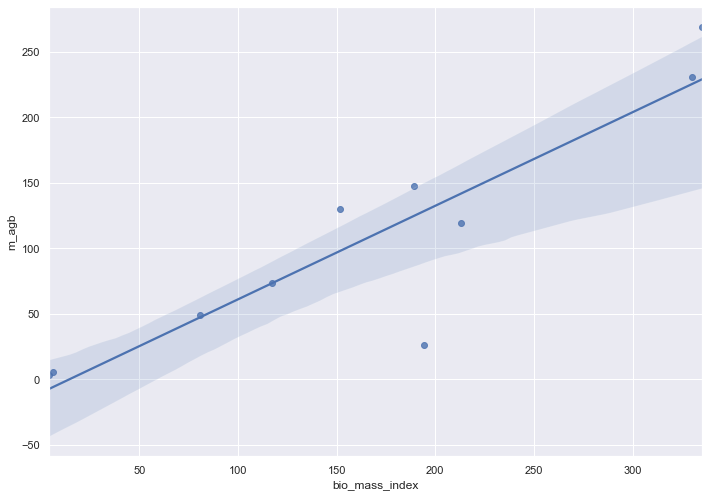

In [56]:
sns.regplot(data=plot_whole, x="bio_mass_index", y="m_agb")
#Correlation coefficents 
foo = ['bio_mass_index','m_agb']
x = plot_whole[foo]
correlations = x.corr(method="pearson")
print(correlations)

###RMSE 
foo = ['bio_mass_index']
x = plot_whole[foo]
x =  x.to_numpy()
foo = ['m_agb']
y = plot_whole[foo]
y= y.to_numpy()

rss=((x-y)**2).sum()
mse=np.mean((x-y)**2)
print("Final rmse value is =",np.sqrt(np.mean((x-y)**2)))


# Conclusion and Discussion 

In [ ]:
__Answer research question and give summary conclusions 

In [ ]:
Unexpected findings 

In [ ]:
Establish newness 

In [ ]:
Explain discrepancies 

In [ ]:
A Good Article is the one that is read and cited 